# Panoramica Continenti

Panoramica dati dei continenti.

> Max Pierini

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
sns.set()

from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [2]:
CONTINENTS = {
    'Europe' : [
        [-31.640625000000004, 65.22621580443068],
        [-14.414062500000002, 34.61488236933614],
        [6.679687500000001, 38.072307761177434],
        [11.370849609375002, 37.16119853011621],
        [17.797851562500004, 33.397115779277804],
        [28.125000000000004, 34.59920735944525],
        [25.8837890625, 39.67474804022493],
        [46.8017578125, 47.18873069925806],
        [49.39453125000001, 68.71633004347179],
        [33.31054687500001, 71.38259358177613],
        [34.80468750000001, 81.30764752063995],
        [2.2851562500000004, 81.03795908502426],
        [-9.492187500000002, 71.68874457897826],
        [-31.640625000000004, 65.22621580443068]
    ],

    'North America' : [
        [-169.1015625, 64.62821321164643],
        [-166.28906250000003, -4.543542325116384],
        [-78.13476562500001, 6.756667073863536],
        [-71.36718750000001, 13.756477901798519],
        [-64.16015625000001, 17.7309196625975],
        [-44.82421875000001, 57.420532112950106],
        [-14.589843750000002, 70.49376030888776],
        [-7.031250000000001, 82.89536246413655],
        [-55.89843750000001, 84.47261624784551],
        [-169.1015625, 76.30842959767809],
        [-169.1015625, 64.62821321164643]
    ],

    'South America' : [
        [-77.56347656250001, 8.279379638294253],
        [-64.68750000000001, 21.576517441880682],
        [-29.443359375000004, -4.120792478444098],
        [-24.609375000000004, -60.4493040040189],
        [-88.06640625000001, -62.947608688260644],
        [-94.833984375, 2.8207588757032247],
        [-87.67089843750001, 6.53512652521894],
        [-79.6728515625, 5.355161897343376],
        [-77.56347656250001, 8.279379638294253]
    ],

    'Africa' : [
        [-5.822753906250001, 35.8982639097007],
        [-27.773437500000004, 21.622900762503807],
        [-25.400390625, 9.284004953723443],
        [17.050781250000004, -40.36817383631919],
        [52.82226562500001, -37.07827065362777],
        [65.56640625000001, -7.003095280765394],
        [50.80078125, 12.648184681156543],
        [43.76953125, 11.703272060234015],
        [33.31054687500001, 32.625219206745705],
        [13.095703125, 34.74557902553385],
        [10.371093750000002, 38.135341501071856],
        [-5.822753906250001, 35.8982639097007]
    ],

    'Asia' : [
        [25.7080078125, 39.67331233790472],
        [46.8017578125, 47.18873069925806],
        [49.39453125000001, 68.71633004347179],
        [41.13281250000001, 81.77294634653771],
        [102.65625000000001, 82.89624647530583],
        [110.56640625000001, 78.83291966348615],
        [171.73828125000003, 71.24040773185591],
        [158.37890625000003, 12.72574473600403],
        [107.22656250000001, -19.96955352290411],
        [70.48828125000001, -2.4585117809536152],
        [51.06445312500001, 13.281595272644003],
        [43.68164062500001, 11.952395812630918],
        [33.44238281250001, 31.762296498750874],
        [26.674804687500004, 36.3114692228268],
        [25.7080078125, 39.67331233790472]
    ],

    'Oceania' : [
        [140.53710937500003, -0.17409843920933274],
        [125.33203125000001, -11.261516780469037],
        [109.24804687500001, -21.612318151487756],
        [110.91796875000001, -40.03402568388044],
        [168.39843750000003, -53.842915608904335],
        [179.73632812500003, -37.99056612188769],
        [179.89013671875003, -19.662061845069733],
        [179.9560546875, -14.92293771873999],
        [174.72656250000003, -11.169272081768627],
        [140.53710937500003, -0.17409843920933274]
    ]   
}

In [3]:
def point_in_continent(lats, lngs, continents):
    results = []
    for lat, lng in zip(lats, lngs):
        point = Point([float(lng), float(lat)])
        continent_name = np.nan
        for continent in continents:
            poly = continents[continent]
            polygon = Polygon(poly)
            if polygon.contains(point):
                continent_name = continent
                break
        results.append(continent_name)

    return results

In [4]:
T = pd.read_csv(
    "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv",
    #index_col=["Country/Region", 'Lat', 'Long']
).sort_index()
R = pd.read_csv(
    "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv",
    #index_col=["Country/Region"]
).sort_index()
D = pd.read_csv(
    "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv",
    #index_col=["Country/Region"]
).sort_index()

In [5]:
T['Continent'] = point_in_continent(
    T.Lat, T.Long, CONTINENTS
)

T_con = T.drop([
    'Province/State', 'Country/Region', 'Lat', 'Long',
], axis=1).groupby('Continent').sum().T

T_con.index = pd.to_datetime(T_con.index)

R['Continent'] = point_in_continent(
    R.Lat, R.Long, CONTINENTS
)

R_con = R.drop([
    'Province/State', 'Country/Region', 'Lat', 'Long',
], axis=1).groupby('Continent').sum().T

R_con.index = pd.to_datetime(R_con.index)

D['Continent'] = point_in_continent(
    D.Lat, D.Long, CONTINENTS
)

D_con = D.drop([
    'Province/State', 'Country/Region', 'Lat', 'Long',
], axis=1).groupby('Continent').sum().T

D_con.index = pd.to_datetime(D_con.index)

***

## TOTAL CASES

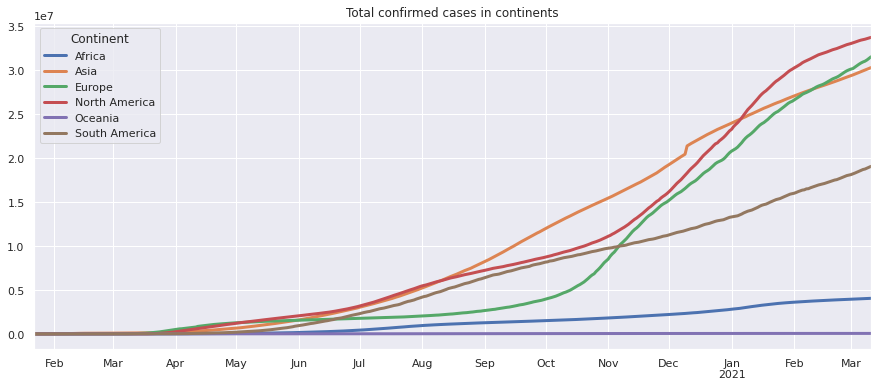

In [6]:
T_con.plot(
    title='Total confirmed cases in continents',
    lw=3,
    figsize=(15, 6),
)
plt.show()

<hr>

## DEATHS

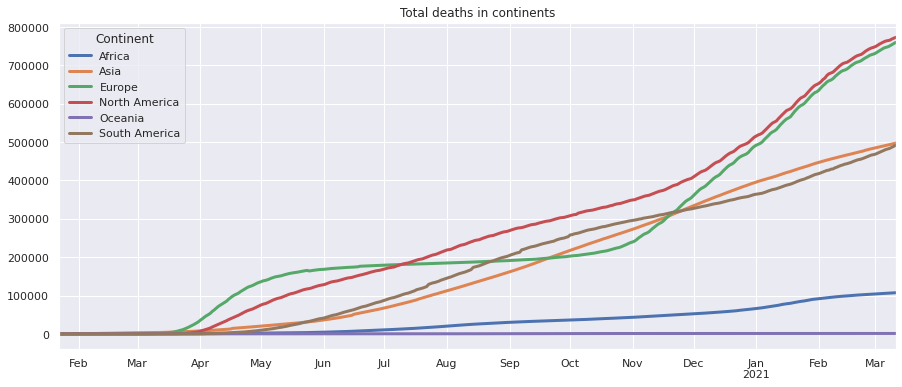

In [7]:
D_con.plot(
    title='Total deaths in continents',
    lw=3,
    figsize=(15, 6),
)
plt.show()

<hr>

## RECOVERED

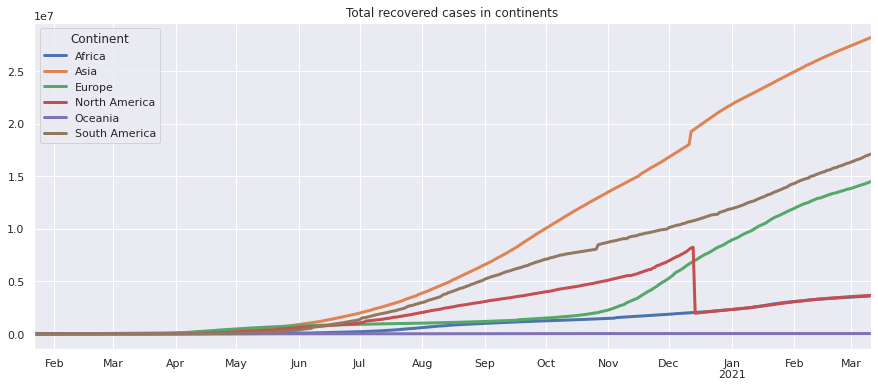

In [8]:
R_con.plot(
    title='Total recovered cases in continents',
    lw=3,
    figsize=(15, 6),
)
plt.show()

<hr>

## INFECTED

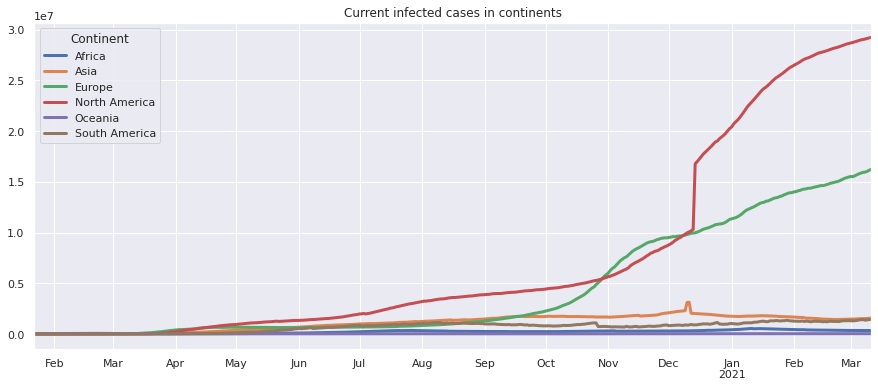

In [9]:
P_con = T_con - (D_con + R_con)

P_con.plot(
    title='Current infected cases in continents',
    lw=3,
    figsize=(15, 6),
)
plt.show()

<hr>

## CFR (Cases Fatality Rate)

!!! PLEASE NOTE !!!

These rates are only useful for **SIRD** epidemiological model ([read here for details](https://maxpierini.it/R0.pdf)) not to define COVID-19 actual rates.

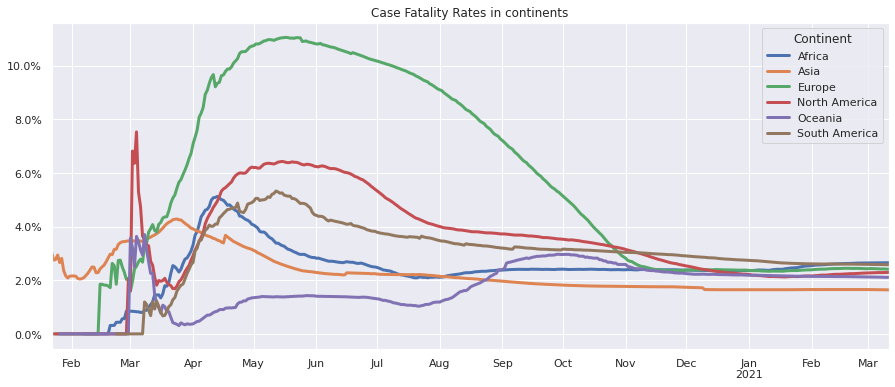

In [10]:
CFR_con = D_con / T_con

ax = CFR_con.plot(
    title='Case Fatality Rates in continents',
    lw=3,
    figsize=(15, 6),
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 1))
plt.show()

## RECOVERY RATE

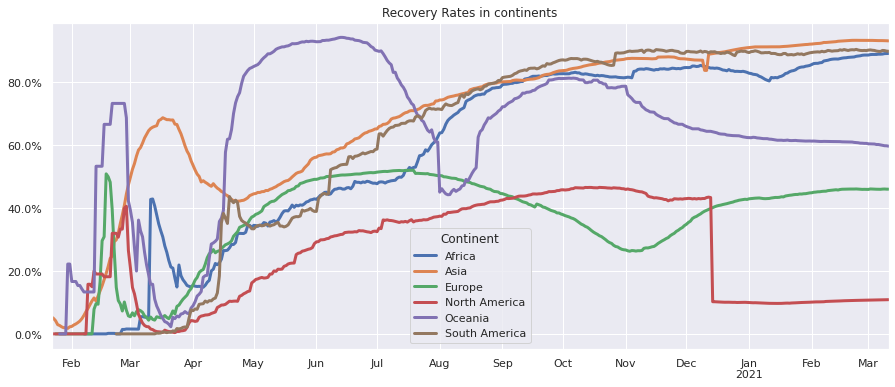

In [11]:
REC_con = R_con / T_con

ax = REC_con.plot(
    title='Recovery Rates in continents',
    lw=3,
    figsize=(15, 6),
)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1, 1))
plt.show()